# SPRING FLOOD ANALYSIS

1. Click box below and choose sheet in excel that you want to do an analysis for.
2. Click on Cell -> Run All

In [61]:
#Choosing LTM model
# Norg, Sver, LTM1,..LTM8, LTMS
sheet = 'LTM5'

In [62]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [63]:
import sys

path = '\\\\energycorp\\applications\\OSL\\jupyter_notebooks\\personalfolders\\MEHO\\spring-flod-analysis'
sys.path.insert(0, path)

import modules as m

%load_ext autoreload
%autoreload 2

print('\n------------------------------------------------------------------------------------------------------\n')
print('                                                  {}                                                '.format(sheet))
print('\n------------------------------------------------------------------------------------------------------\n')
file = r'spring_flod_analysis.xlsx'

#Read and print dates for when saved models started from
m.saved_runs_excel(file)

#Reading comments etc from Excel file: 'Etteranalyse_snow_LTM.xlsx'
all_keys, vhhQ_OBSE_list, comments_list, excluded_list, start_list, end_list = m.main_read_excel(sheet, file)
    
#Reading in all keys from SMG
all_df, all_resources = m.read_timeseries(all_keys, vhhQ_OBSE_list, sheet)

#Making new df for all models for analyis period
df_analysis_period, resources_analysis_period, start_info_list, end_info_list, df_analysis2_list, start_analysis2_list = m.df_analysis_period(all_df, all_resources, start_list, end_list, sheet)

#Excluding columns that are chosen to be excluded in the Excel document
df_for_analysis, keys_for_analysis = m.exclude_keys(df_analysis_period, all_keys, excluded_list)

#Calculating performance of the models
acc_perf_all, R2_perf_all = m.calc_performance(df_for_analysis, keys_for_analysis)



if sheet == 'Norg':
    acc_perf = acc_perf_all.drop('Norge')
elif sheet == 'Sver':
    acc_perf = acc_perf_all.drop('Sverige')
else:
    acc_perf = acc_perf_all
    
m.summary_table(df_analysis_period, all_keys, sheet)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

------------------------------------------------------------------------------------------------------

                                                  LTM5                                                

------------------------------------------------------------------------------------------------------

Time saved models were started from:
REF1: 2019-02-21 00:00:00
REF2: 2019-05-27 00:00:00
TEMP1: 2019-04-04 00:00:00
TEMP2: TEMP day-1d day
572.91153063197 451.18592610531095 121.72560452665903
Second Analysis start (2019-05-31): Day befor second snow adjustment.
234.40174017130101 116.04854532953199 118.35319484176902
Second Analysis start (2019-05-11): Day befor second snow adjustment.
321.834346121392 96.03513128870769 225.7992148326843
Second Analysis start (2019-06-06): Day befor second snow adjustment.



## BOX AND WHISKER PLOT ACCUMULATIVE DEVIATION FROM Q_OBSE

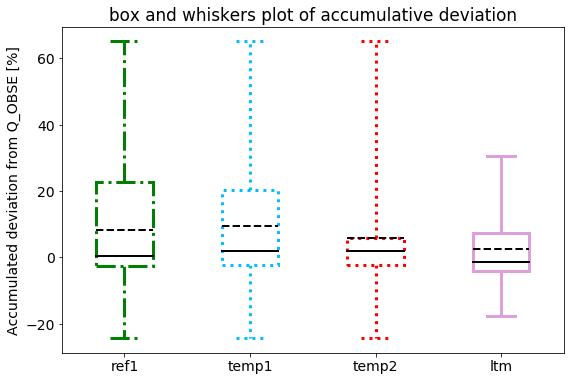

In [ ]:
m.box_plot(acc_perf)

# Performance According to Accumulated Deviation from Q_OBSE
## ADJUSTMENTS: BETTER or WORSE

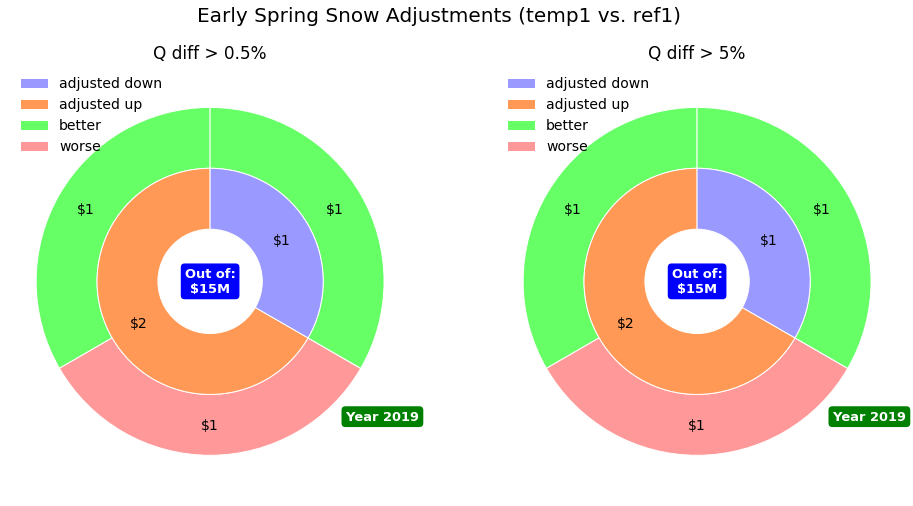

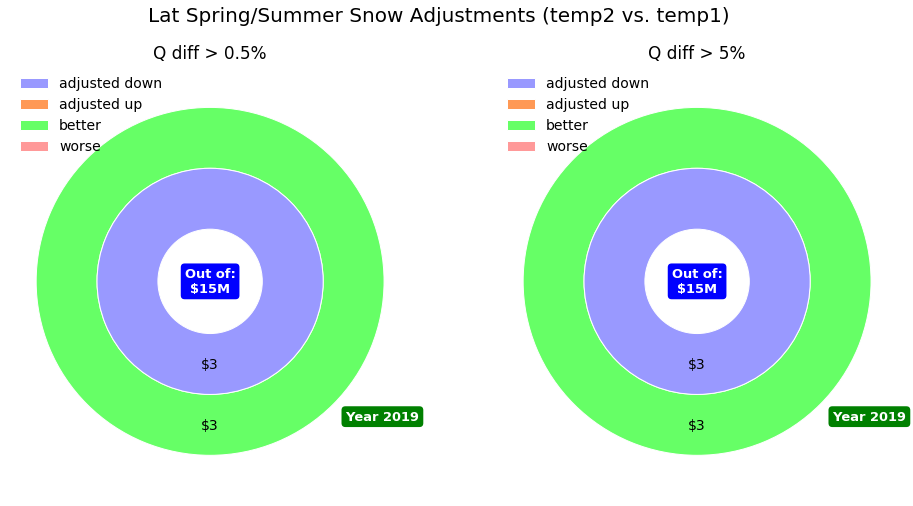

In [ ]:
# Macke pie plot with performance for adjusted models
m.pie_subplot_perf(acc_perf, sheet, 'ref1', 'temp1')
m.pie_subplot_perf(acc_perf, sheet, 'temp1', 'temp2')
#m.pie_subplot_perf(acc_perf_df, ltm, what='snow')


# Performance According to Accumulated Inflow [%] Error and Inflow Profile Correlation (R2) 

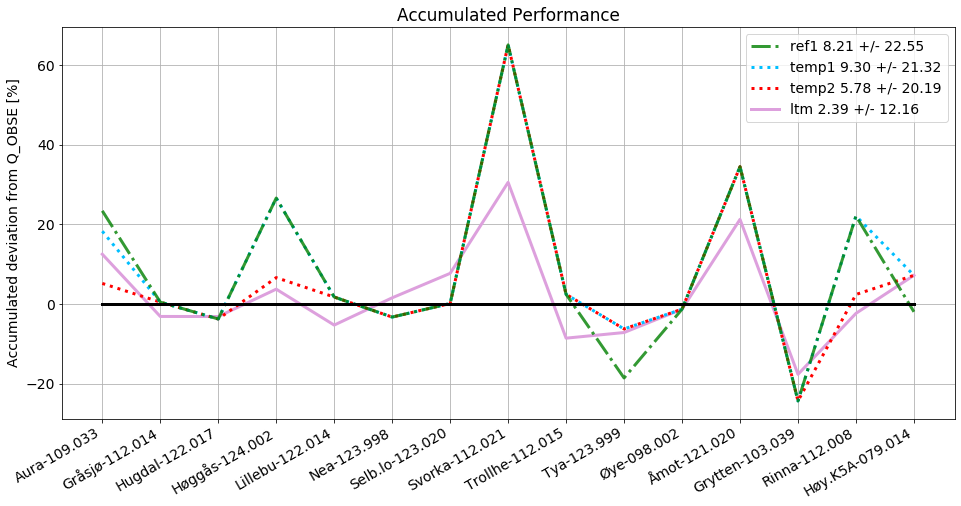

In [ ]:
#plot performance for models in the LTM model
m.plot_perf_models(acc_perf_all, sheet, perfType='Accumulated')


# Induvidual Analysis for Each Model




------------------------------------------------------------------------------------------------------------------------
                                                        Aura-109.033
------------------------------------------------------------------------------------------------------------------------
Analysis start (2019-03-04): Day befor first snow adjustment.
Analysis end (2019-09-01): read from excel.

Comment from Excel file: "Gav veldig lave vannvedier tidlig på vinteren. For mye snø"



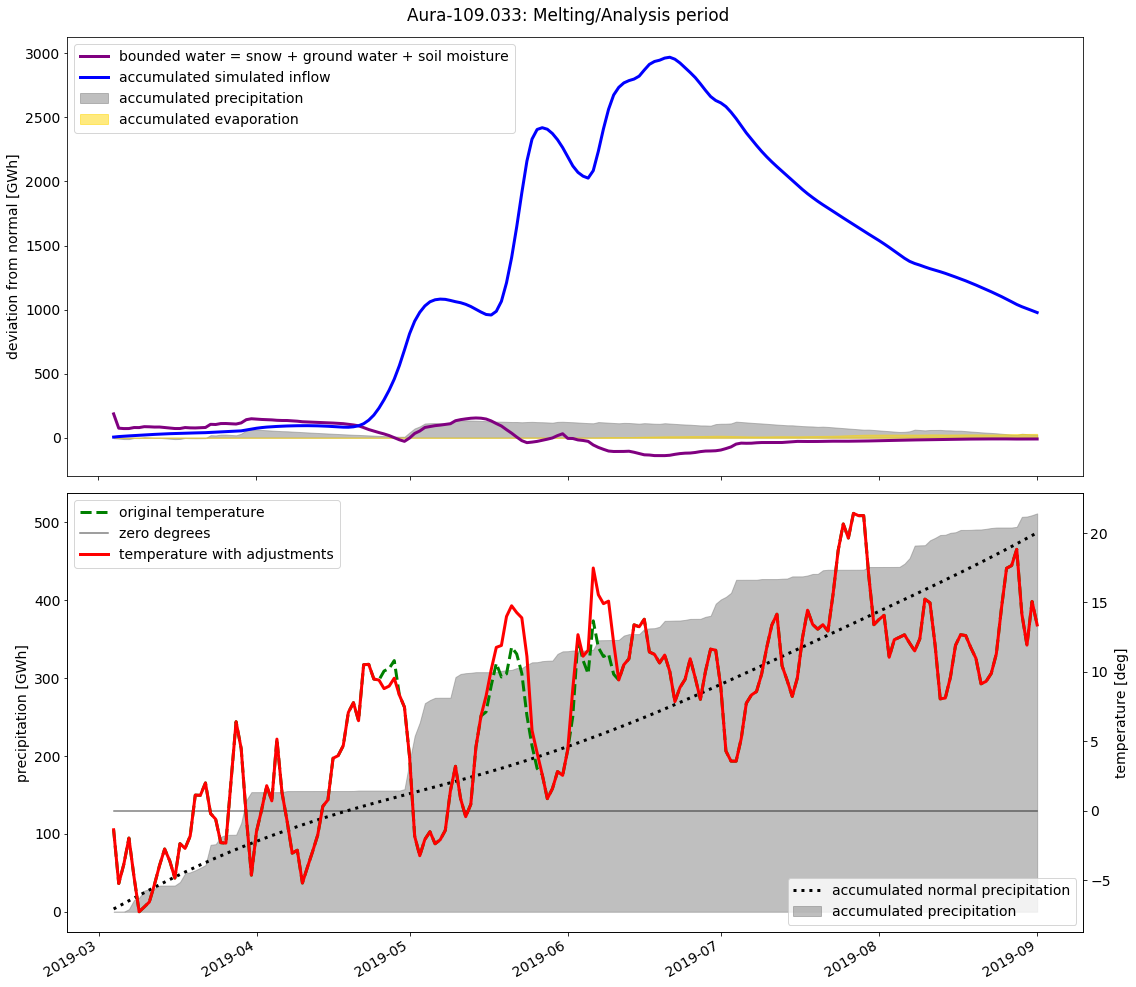

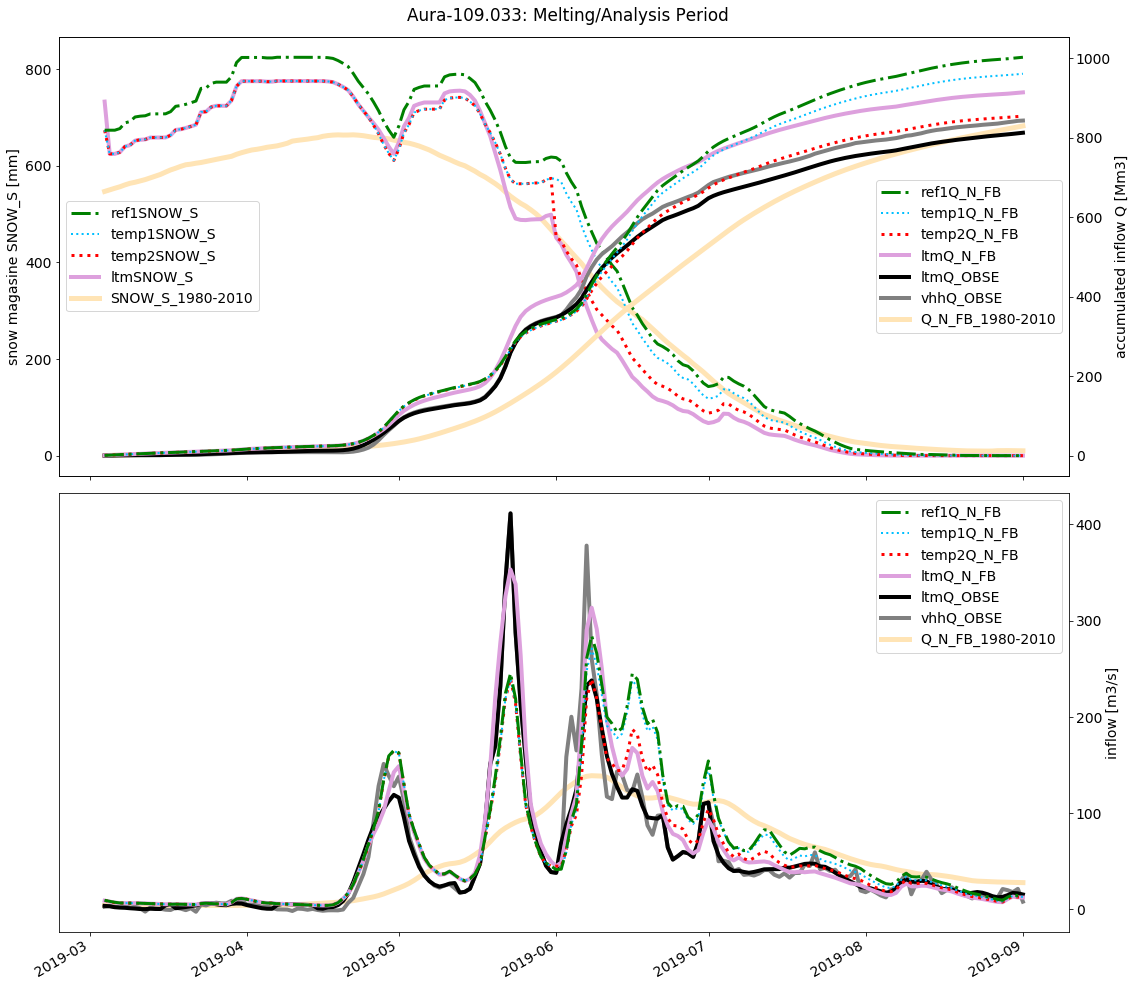


Accumulated performance [percentage deviation]: ref1: 23.38, temp1: 18.26, temp2: 5.16, ltm: 12.50
Profile correlation performance [R2 value]: ]: ref1: 0.72, temp1: 0.75, temp2: 0.85, ltm: 0.92


check ok


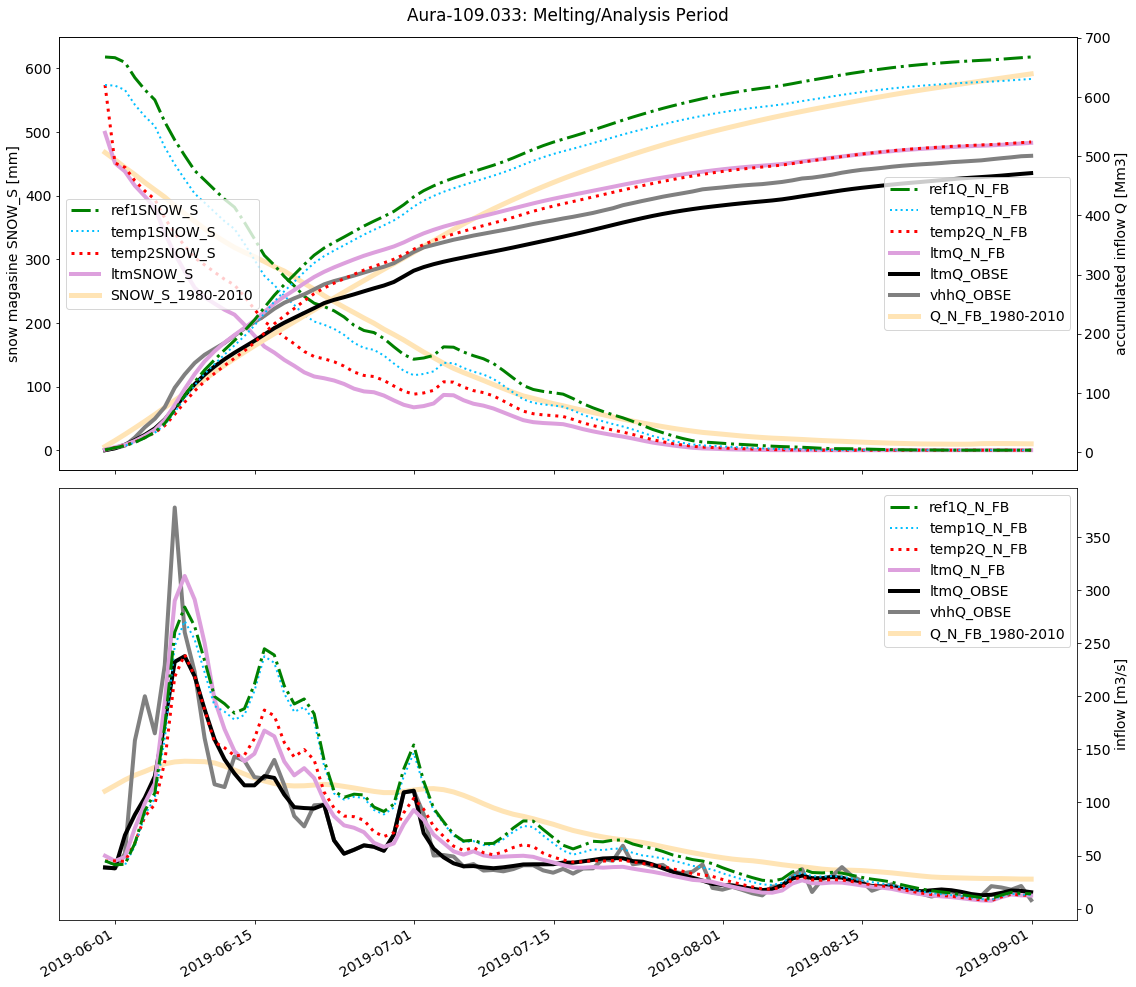

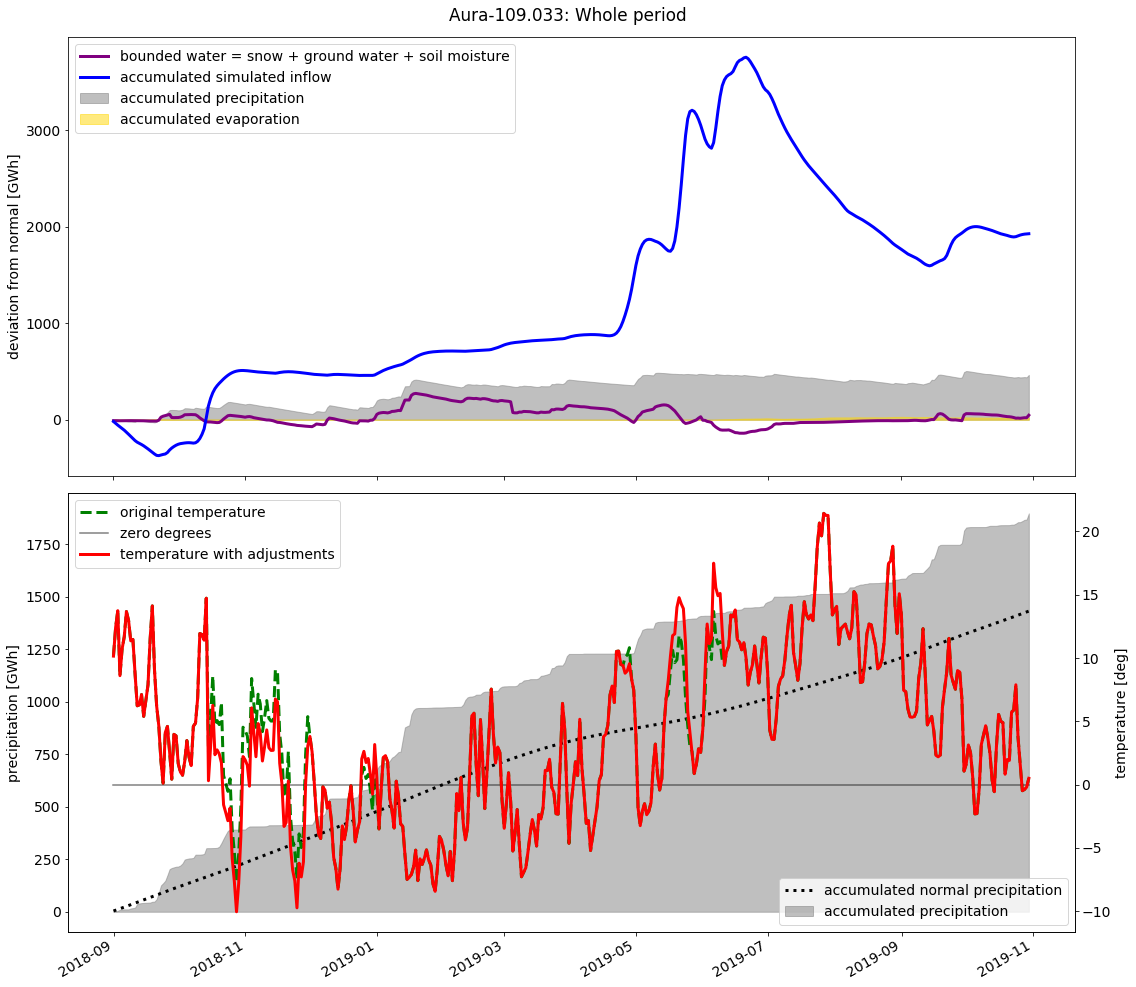

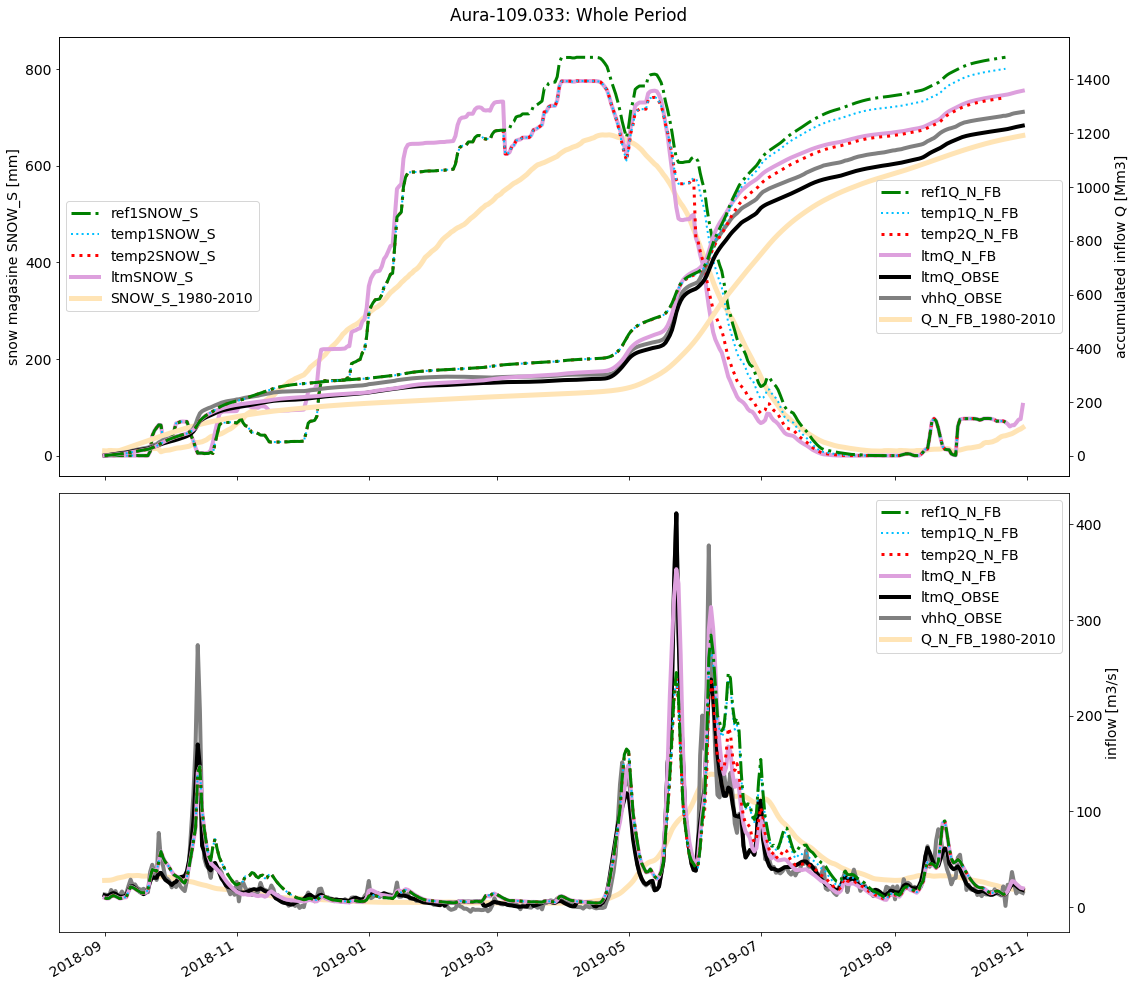








------------------------------------------------------------------------------------------------------------------------
                                                        Gråsjø-112.014
------------------------------------------------------------------------------------------------------------------------
Analysis start (2019-04-01): read from excel.
WARNING! Analysis end (2019-09-16): this script did not find a sufficient estimation of the end of the spring flod, used here date for the ref snow magasine minimum.

Comment from Excel file: "For mye snø (hele møre, bortsett fra de lavereliggende feltene). På trollheim/gråsjø i år (2019) ble snømagasinet justert drastisk ned rundt juni tider fordi modellen hadde alt for mye snø, og smelta da snø som ikke fantes lenger. Dette ble seende veldig fint ut, og vannverdien økte veldig siden dette gav dem mulighet til å regulere magasinene i stedenfor å kjøre fullt hele sommeren igjennom."



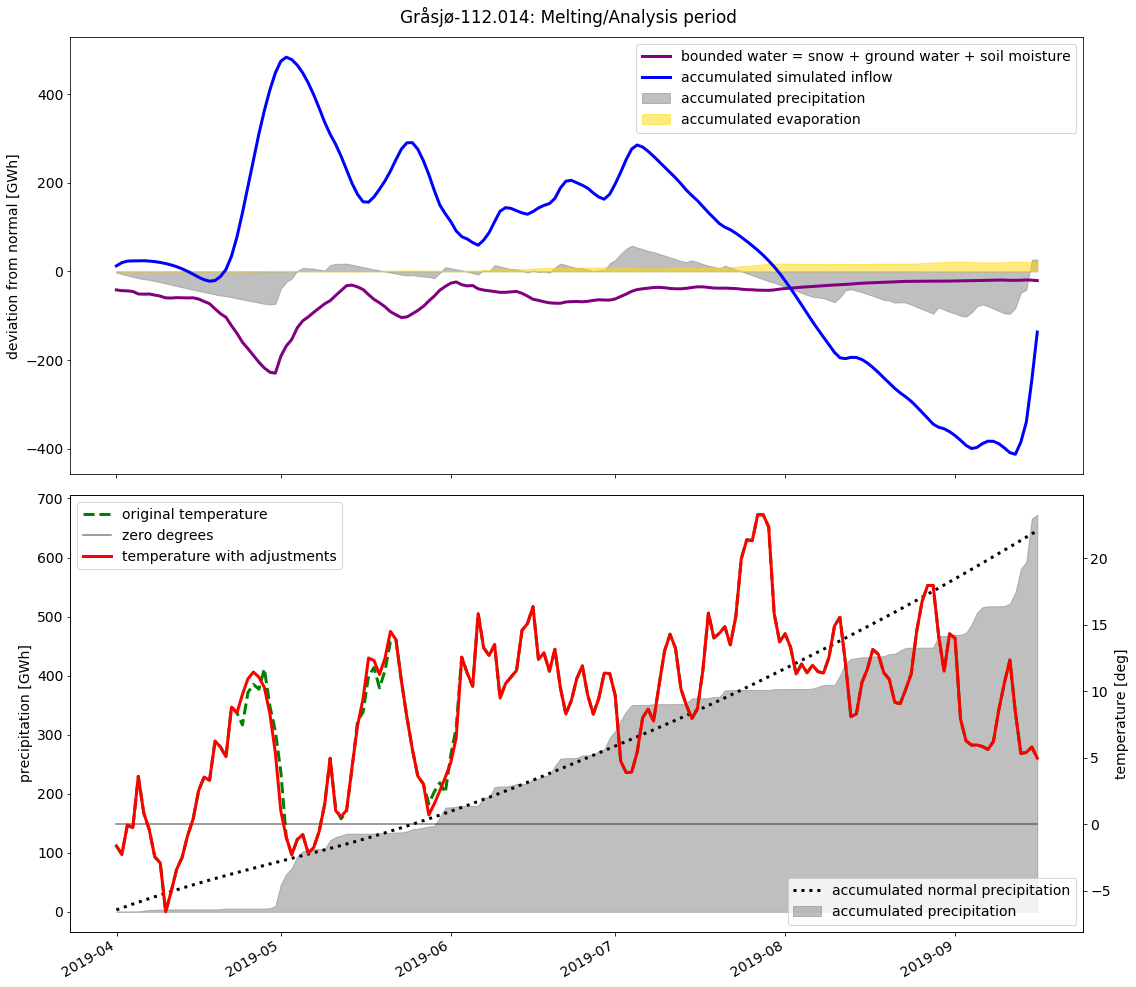

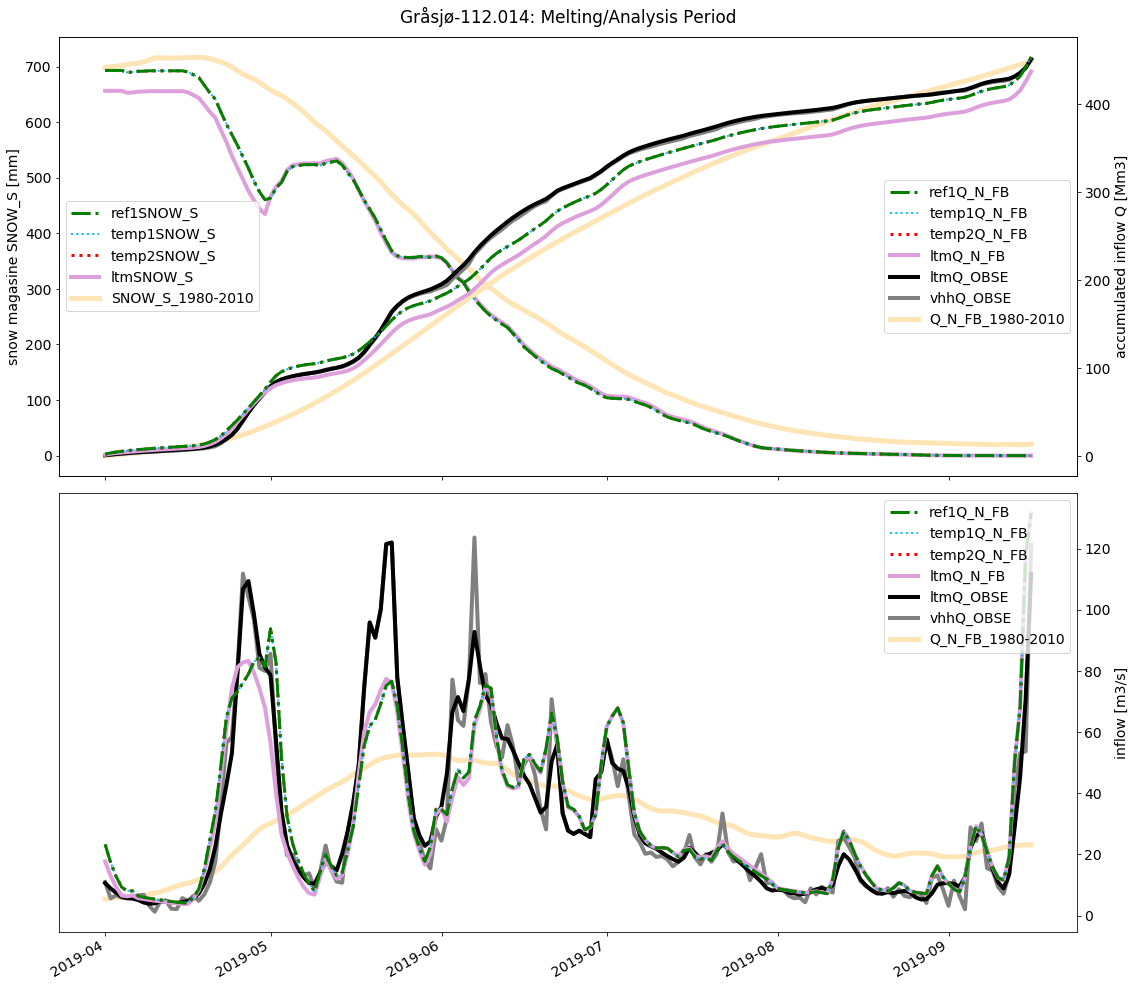


Accumulated performance [percentage deviation]: ref1: 0.48, temp1: 0.48, temp2: 0.48, ltm: -3.12
Profile correlation performance [R2 value]: ]: ref1: 0.82, temp1: 0.82, temp2: 0.82, ltm: 0.83




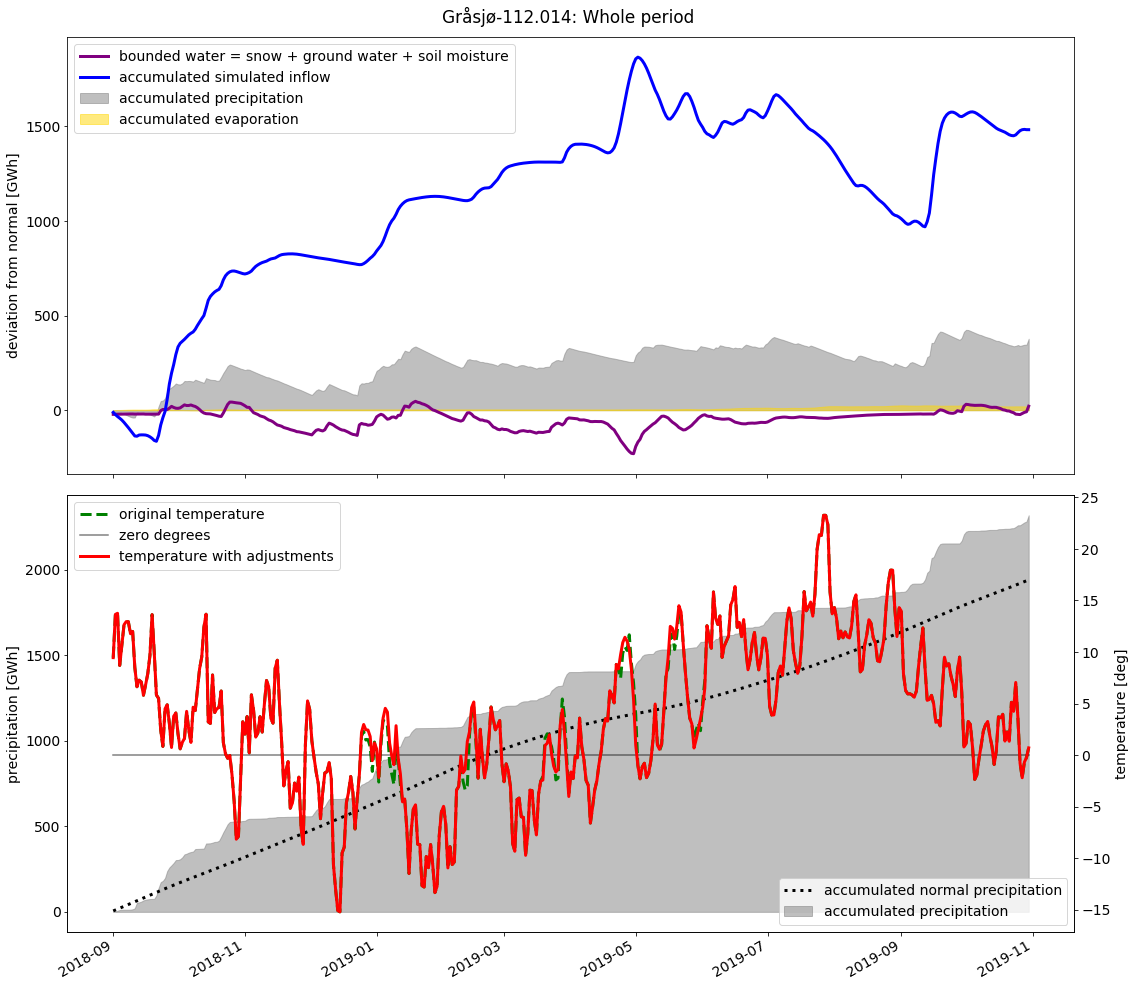

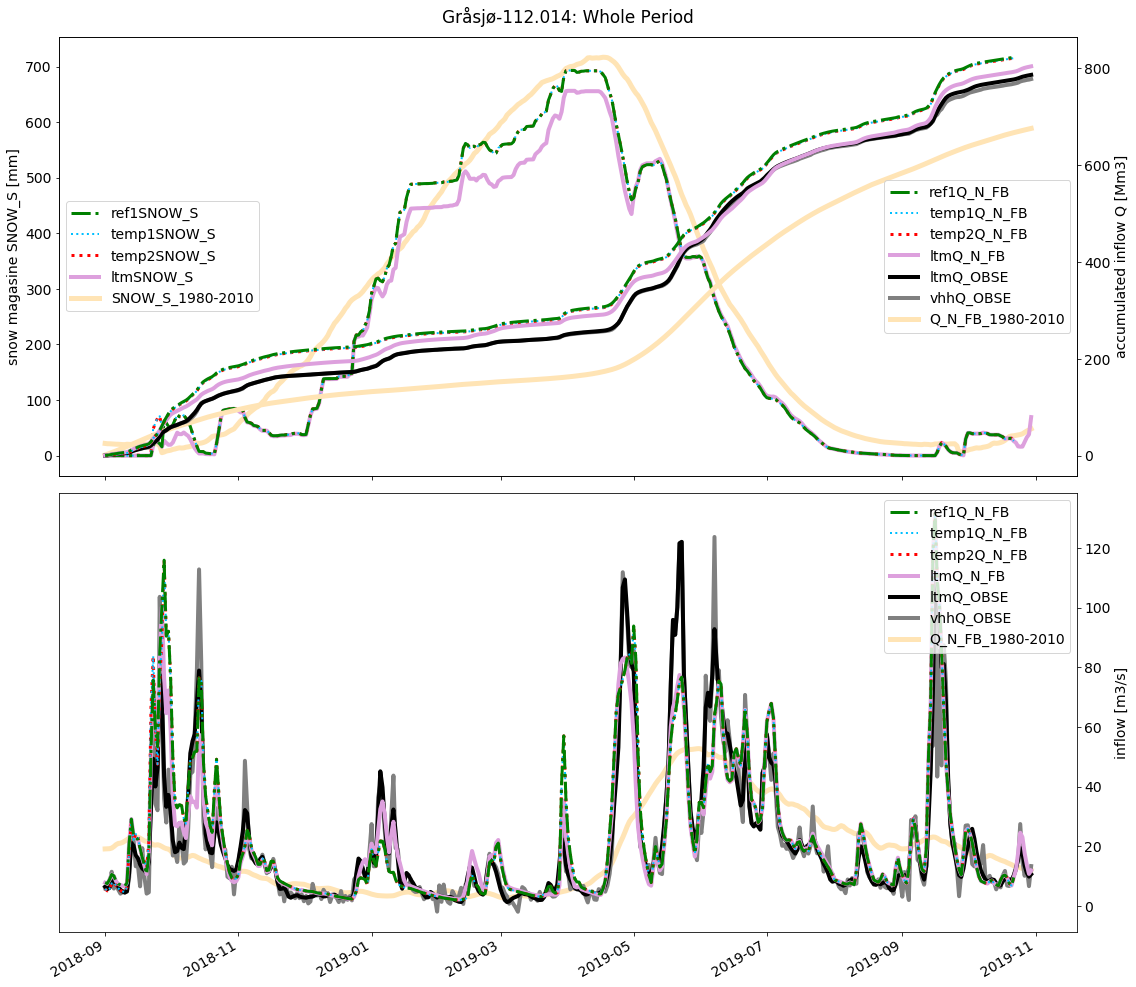








------------------------------------------------------------------------------------------------------------------------
                                                        Hugdal-122.017
------------------------------------------------------------------------------------------------------------------------
Analysis start (2019-03-26): Peak of snow magasine for ref inndatasett.
Analysis end (2019-07-15): read from excel.


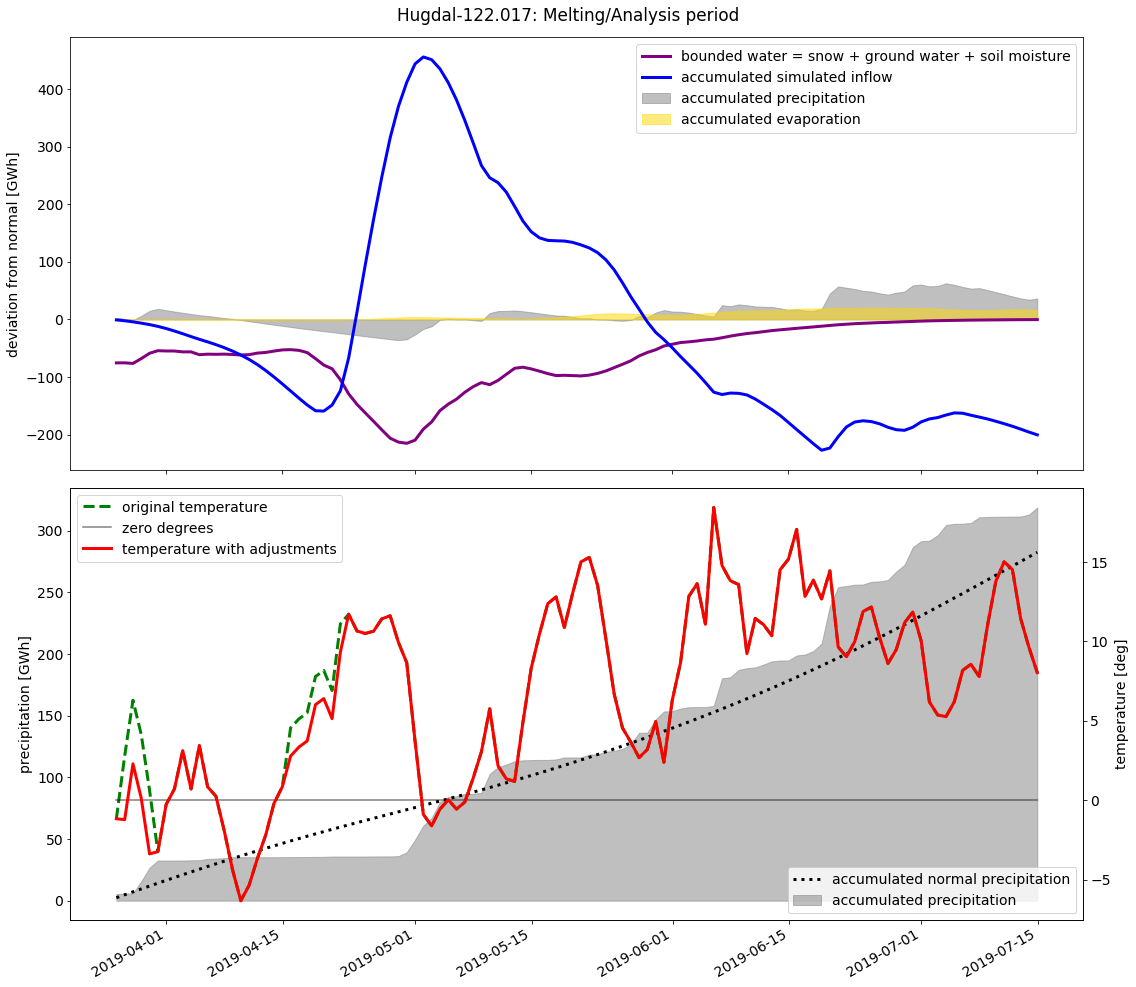

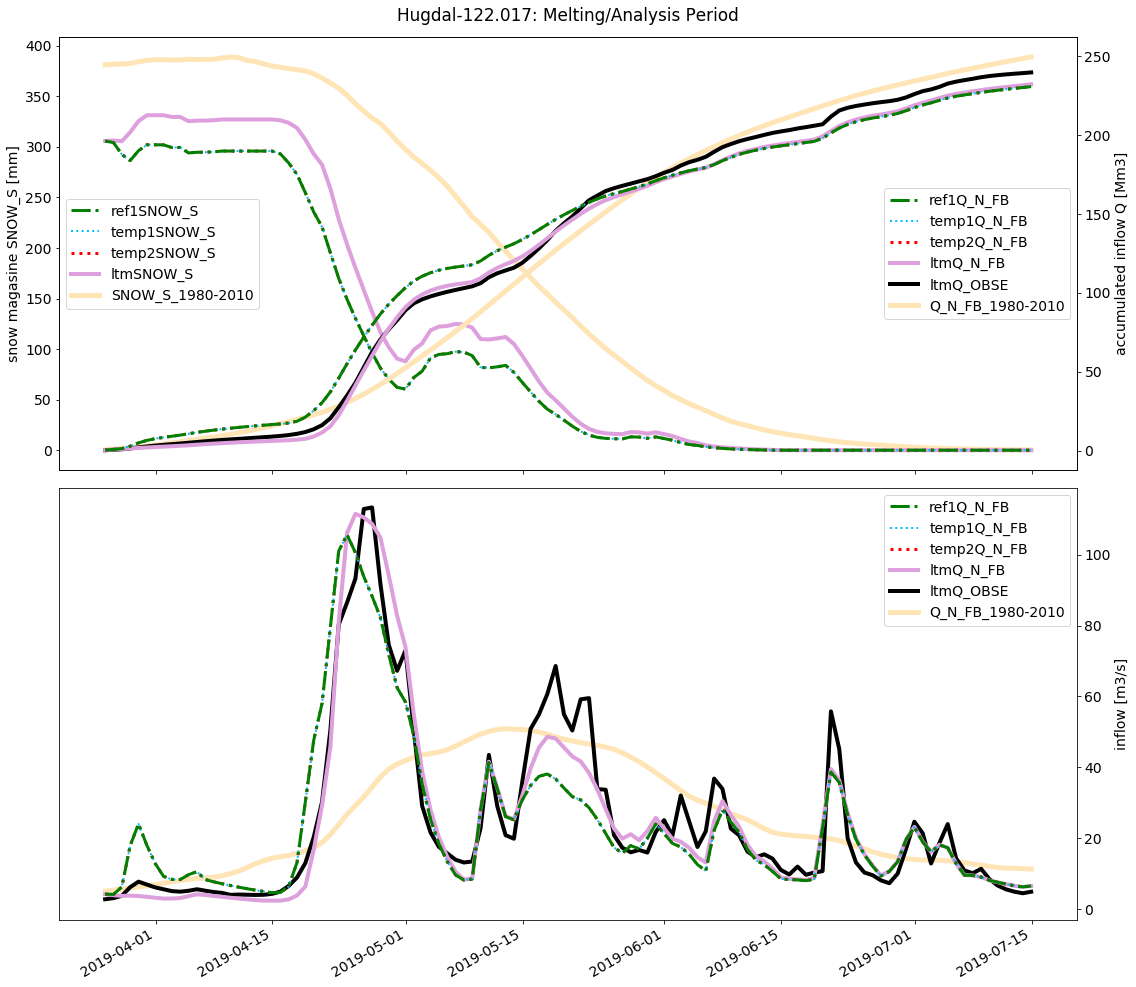


Accumulated performance [percentage deviation]: ref1: -3.76, temp1: -3.76, temp2: -3.76, ltm: -3.14
Profile correlation performance [R2 value]: ]: ref1: 0.82, temp1: 0.82, temp2: 0.82, ltm: 0.92




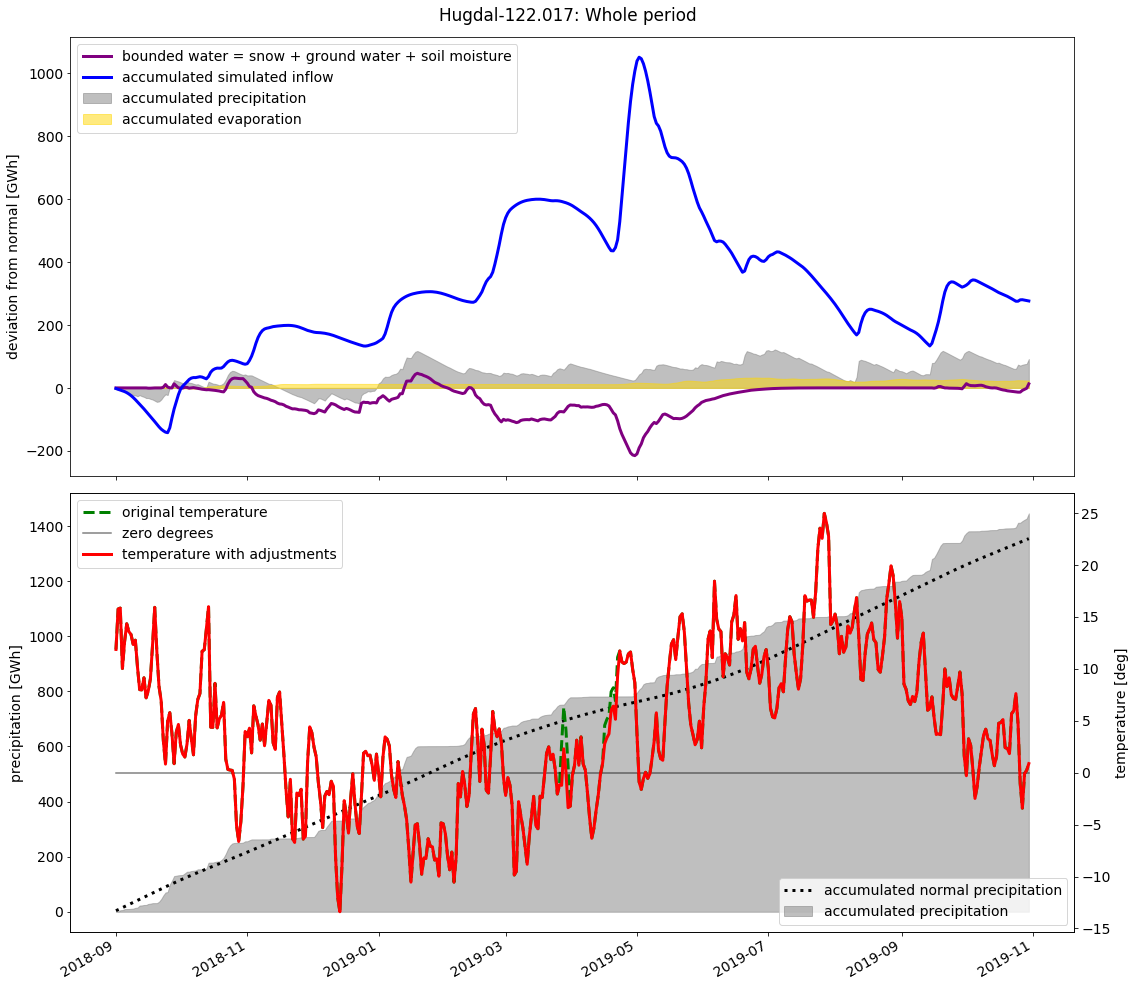

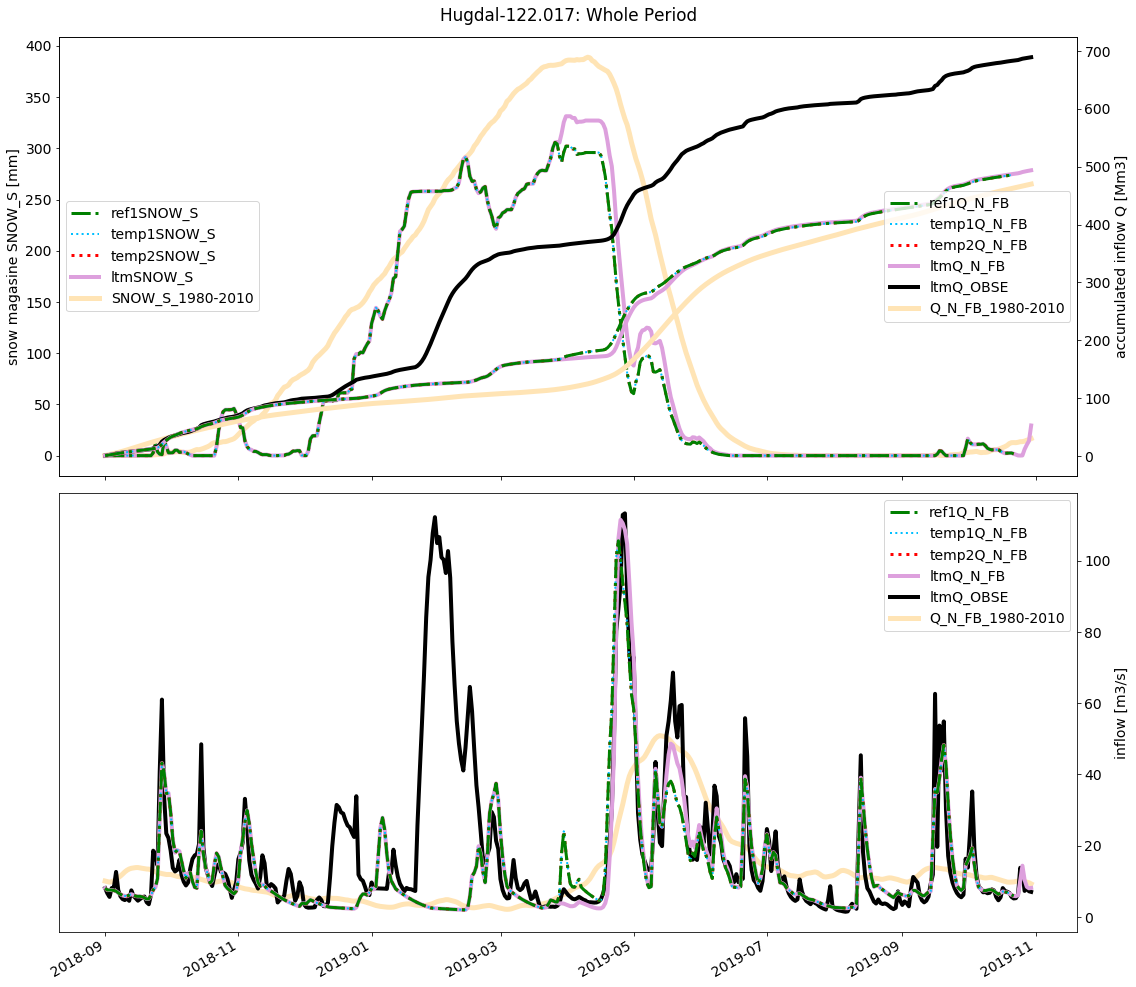








------------------------------------------------------------------------------------------------------------------------
                                                        Høggås-124.002
------------------------------------------------------------------------------------------------------------------------
Analysis start (2019-03-31): Peak of snow magasine for ref inndatasett.
WARNING! Analysis end (2019-07-15): this script did not find a sufficient estimation of the end of the spring flod, used here date for the ref snow magasine minimum.


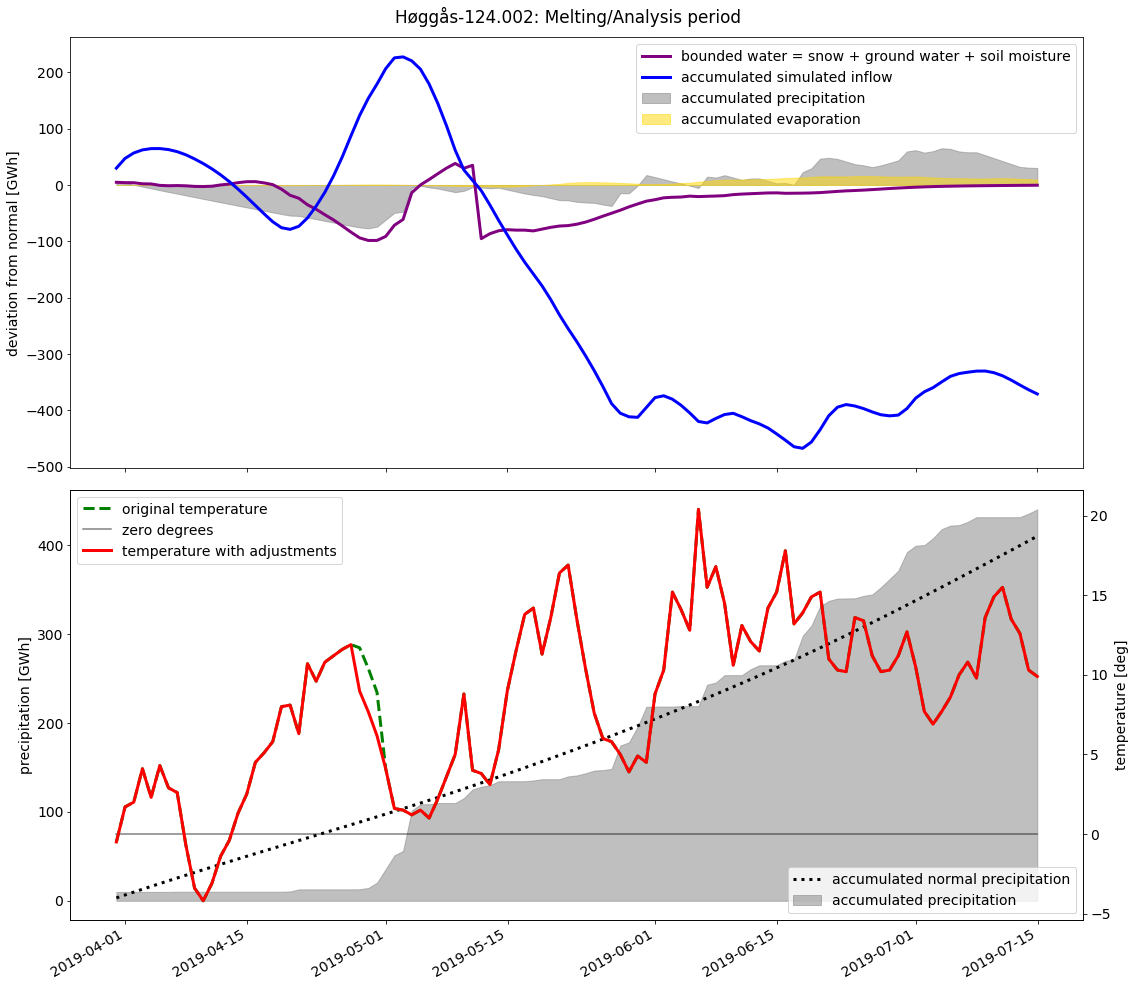

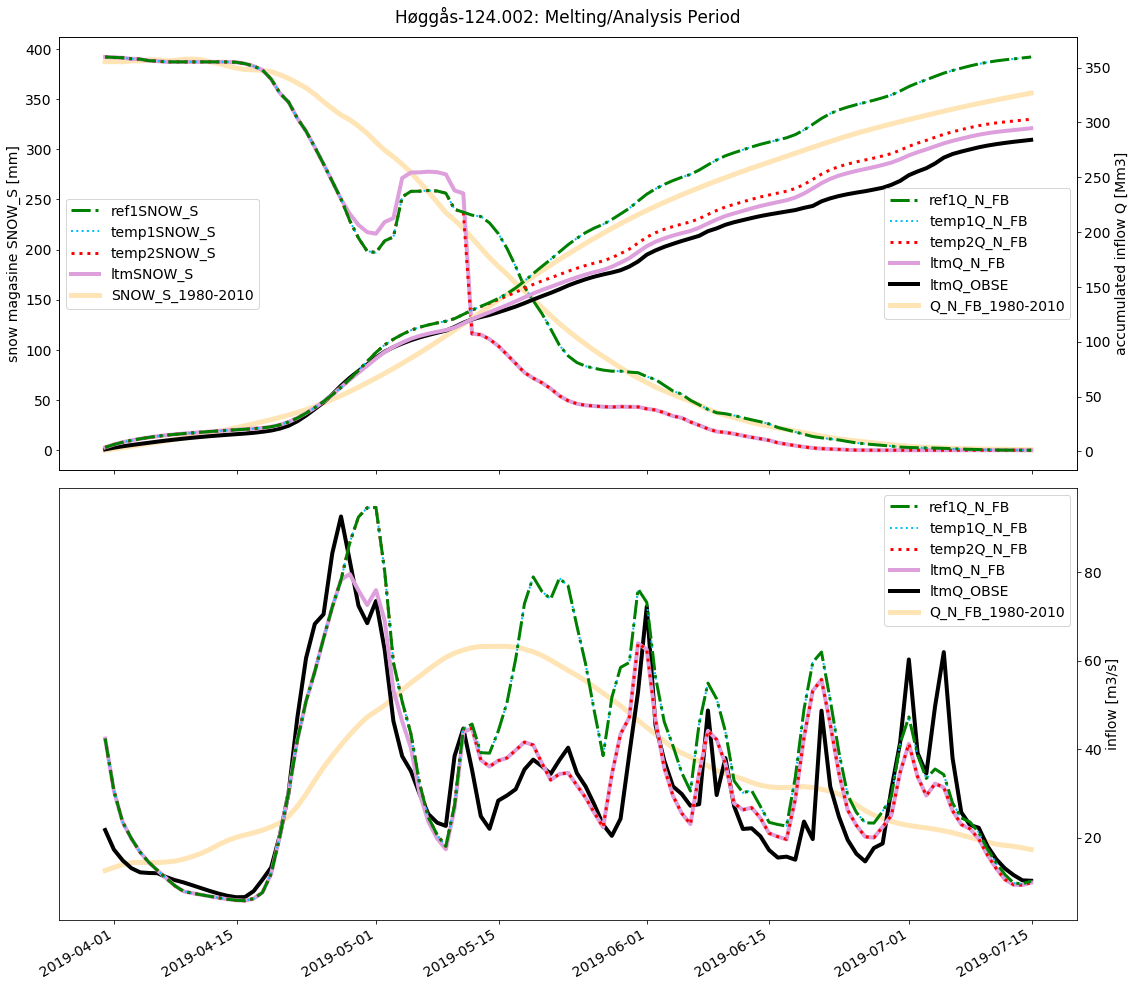


Accumulated performance [percentage deviation]: ref1: 26.59, temp1: 26.59, temp2: 6.62, ltm: 3.72
Profile correlation performance [R2 value]: ]: ref1: 0.30, temp1: 0.30, temp2: 0.75, ltm: 0.80


check ok


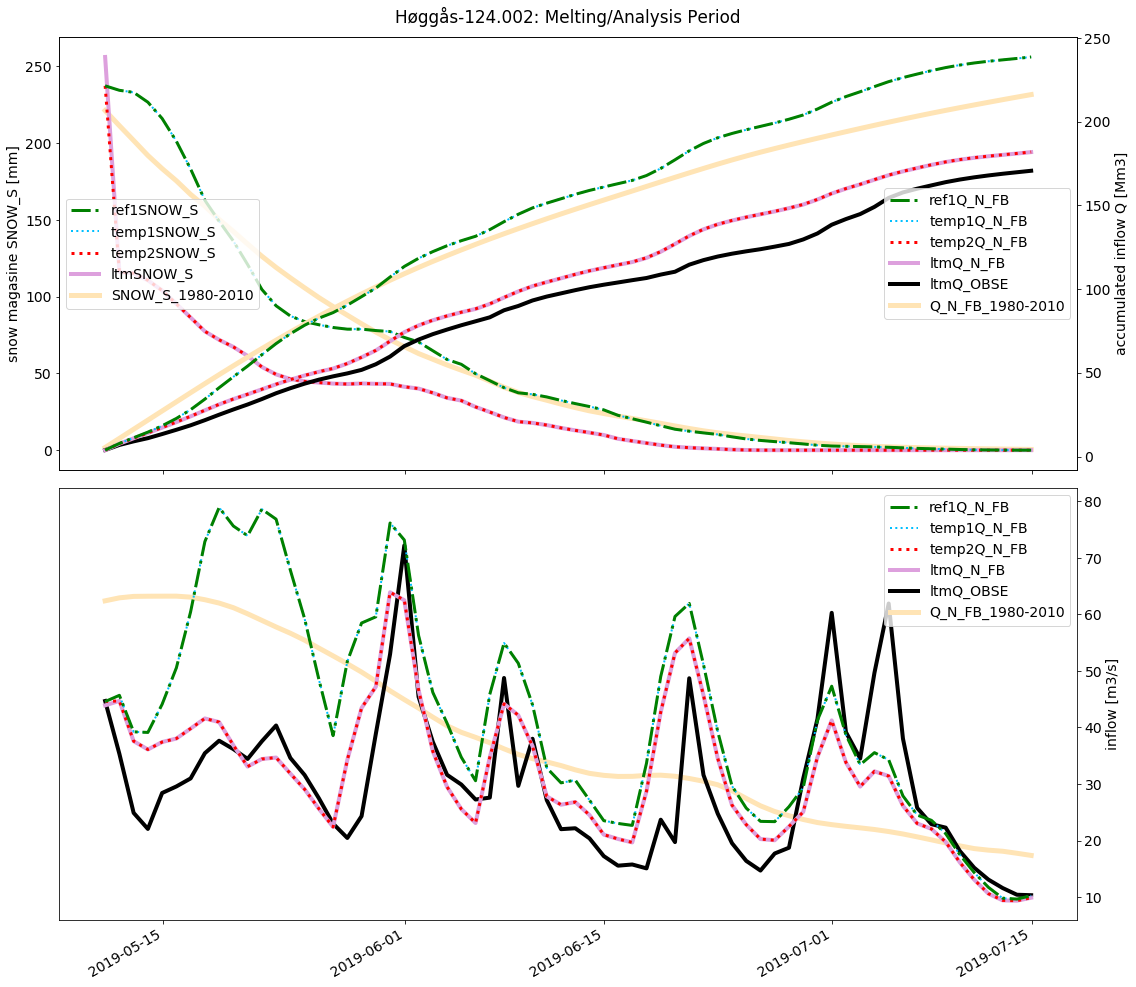

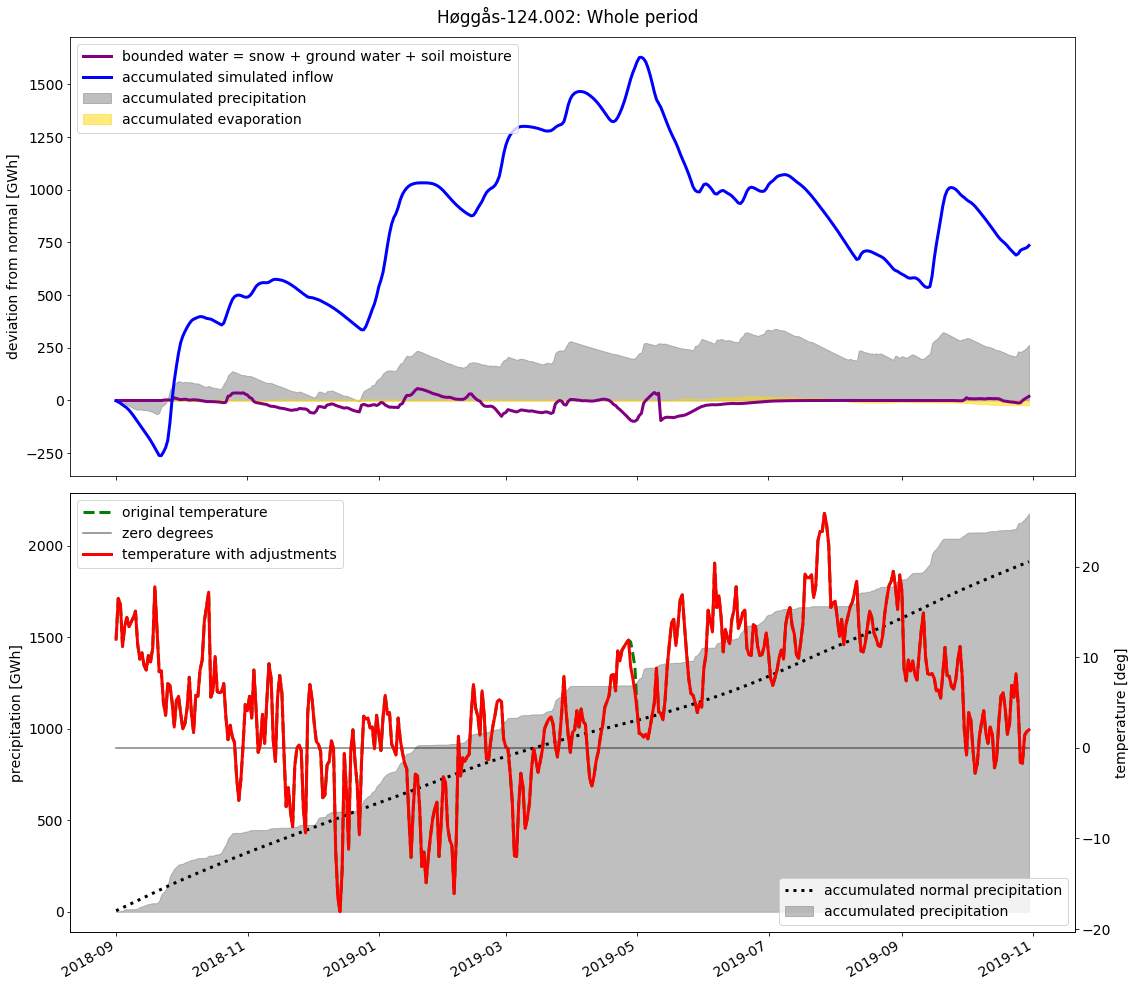

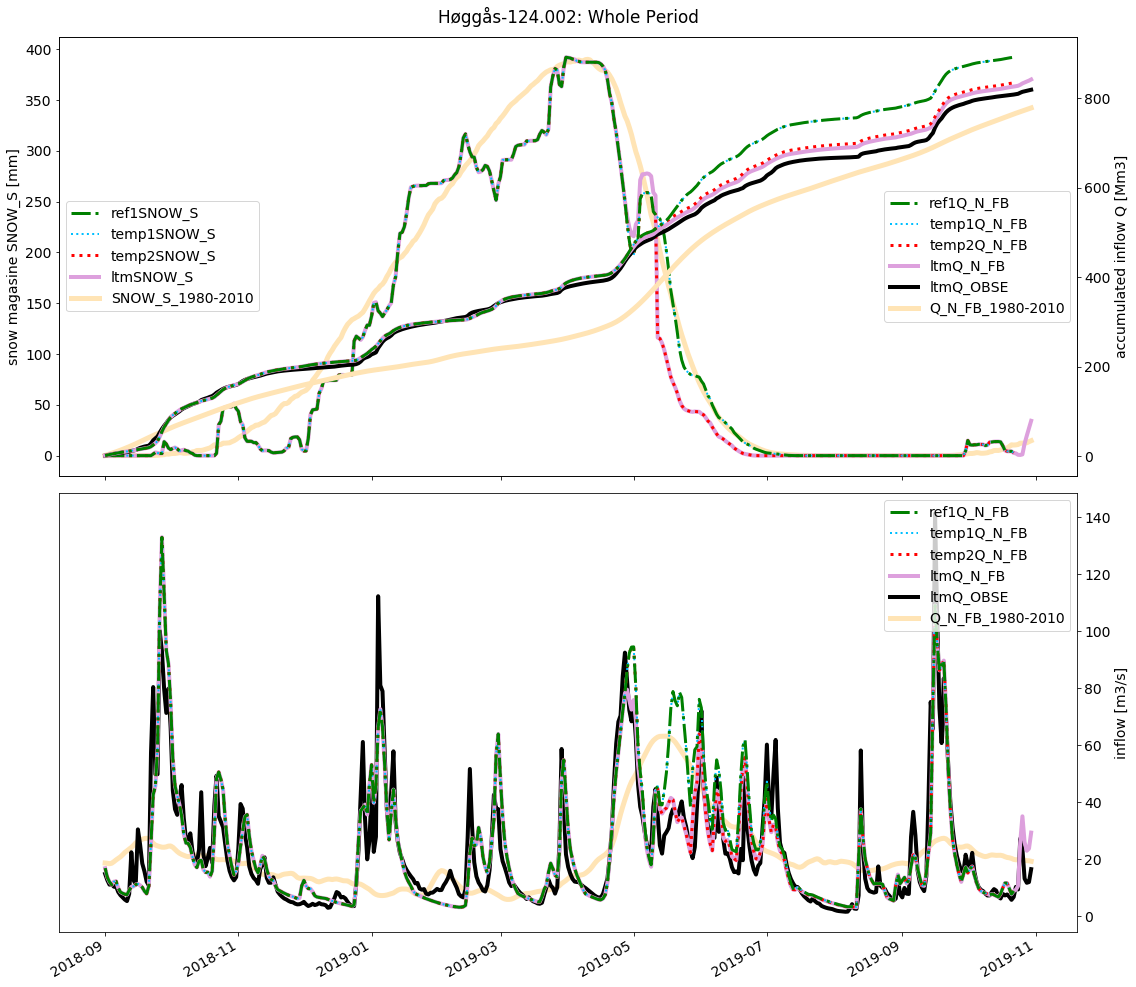








------------------------------------------------------------------------------------------------------------------------
                                                        Lillebu-122.014
------------------------------------------------------------------------------------------------------------------------
Analysis start (2019-03-26): Peak of snow magasine for ref inndatasett.
WARNING! Analysis end (2019-07-05): this script did not find a sufficient estimation of the end of the spring flod, used here date for the ref snow magasine minimum.


In [ ]:
m.make_all(df_analysis_period, all_df, resources_analysis_period, all_resources, all_keys, start_info_list, end_info_list, sheet, vhhQ_OBSE_list, comments_list, excluded_list, file, df_analysis2_list, start_analysis2_list)